## K-means Clustering On Image

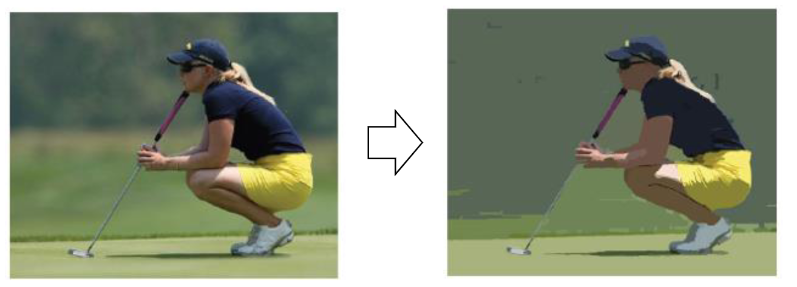

start
[[168  74 136]
 [157 177 152]
 [194  44 100]]
number:  1
[[146 133 142]
 [147 139 150]
 [146 125 132]]
number:  2
[[132 137 138]
 [161 195 214]
 [136  89  92]]
number:  3
[[142 139 139]
 [163 198 218]
 [135  88  90]]
number:  4
[[147 138 137]
 [163 198 219]
 [135  87  90]]
number:  5
[[151 134 132]
 [163 198 219]
 [134  86  90]]
number:  6
[[158 125 121]
 [162 198 218]
 [130  84  88]]
number:  7
[[162 113 107]
 [162 198 218]
 [115  76  84]]
number:  8
[[161 108 103]
 [162 197 217]
 [100  69  82]]
number:  9
[[159 107 102]
 [162 197 217]
 [ 98  65  79]]
number:  10
[[157 107 102]
 [162 197 216]
 [ 96  64  78]]
number:  11
[[157 106 102]
 [162 197 216]
 [ 96  63  77]]
number:  12
[[156 106 102]
 [162 197 216]
 [ 95  62  77]]
number:  13
[[156 106 102]
 [162 197 216]
 [ 95  62  76]]
number:  14
[[156 106 102]
 [162 197 216]
 [ 95  61  76]]
number:  15
[[156 106 102]
 [162 197 216]
 [ 95  61  76]]
find!
[[156 106 102]
 [162 197 216]
 [ 95  61  76]]


(-0.5, 255.5, 255.5, -0.5)

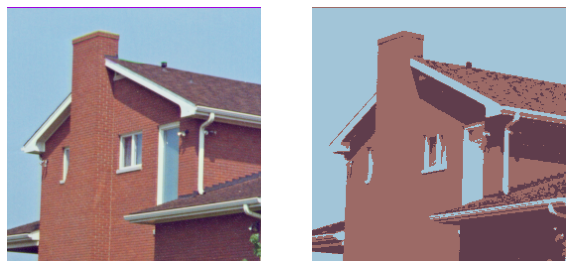

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 


img = Image.open('Image/house.bmp')
img = np.array(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, 'gray')
axes[0].axis('off')

def kmeans(img, k):
    # Repeat Time
    repeat = 1      
    
    # initial Centroid
    centroid = np.random.uniform(0,256,(k,3)).astype(np.uint8) 
    print('start')
    print(centroid)
    
    h,w = img.shape[:2]
    while True:
        print('number: ',repeat)   # Display Repeat Time
        repeat+=1
        
        # groups
        groups = []
        # indexes
        indexes = []
        
        for d in range(k):
            groups.append([])
            indexes.append([])
        
        # 거리에 따라 group에 각 필셀 추가
        for i in range(h):
            for j in range(w):
                distances = np.array([])
                for d in range(k):
                    distances = np.append(distances, np.sum((img[i,j,:] - centroid[d])**2))
                idx=np.argmin(distances)
                groups[idx].append(img[i,j])
                indexes[idx].append([i,j])
        
        # 각 그룹의 평균값으로 다음 centriod -> 픽셀값의 평균 계산
        next_centroid = np.zeros((k,3),dtype='int')
        for d in range(k):
            next_centroid[d] = np.array(groups[d]).mean(axis=0)
        print(next_centroid)
        
        # 종료조건
        if(np.array_equal(centroid, next_centroid)):
            print('find!')
            break
        centroid = next_centroid
    
    # 각 그룹에 centriod값 할당
    for i in range(k):
        for j in range(len(indexes[i])):
            img[indexes[i][j][0],indexes[i][j][1],:]=centroid[i]

    return centroid, img

centroids, result_img = kmeans(img,3)
print(centroids)

axes[1].imshow(result_img, 'gray')
axes[1].axis('off')